# Programming inside Google Colab: Integrating Colab with cloud storage and data repositories

In this notebook, we are going to see the basics of cloud computing in Colab through an example.

Colab provides a Python 3 environment tailored for data science and machine learning. It provides virtual machines where you get some CPU time, some disk space and memory, which you can all expand (for a price) as well as adding GPUs and TPUs for machine learning purposes. It is an interesting option because it's consistent for everyone (So, replicable) and accessible from everywhere.

It is probably not recommended for research, because the environment changes regularly, so in the time span of an economics paper the codes may not run correctly by the end of the project, but it is ideal for experimenting with data science tools without having to install your own environment.

## We are going to do a small research project that integrates Colab with the following services:
- Google Drive
- Github
- Huggingface
- Kaggle

## What are we going to do in this notebook?

- Mount Google Drive into Colab to access our files
- Make accounts for huggingface and kaggle, get user tokens, save them to drive and load them into Colab
- Download a dataset from kaggle and train a small image classification algorithm
- Save the data to our google drive
- Upload the model to our huggingface account

## First of all, Colab runs Python 3. So, whatever you have learned about Python applies here.

> Añadir blockquote



For instance, here we load one of the example datasets from the included sample_data folder, and indeed, Pandas works as we would expect:


In [1]:
import pandas as pd, geopandas as gp
california = pd.read_csv('sample_data/california_housing_train.csv')
california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Or, for instance, Geopandas is installed and runs just fine:

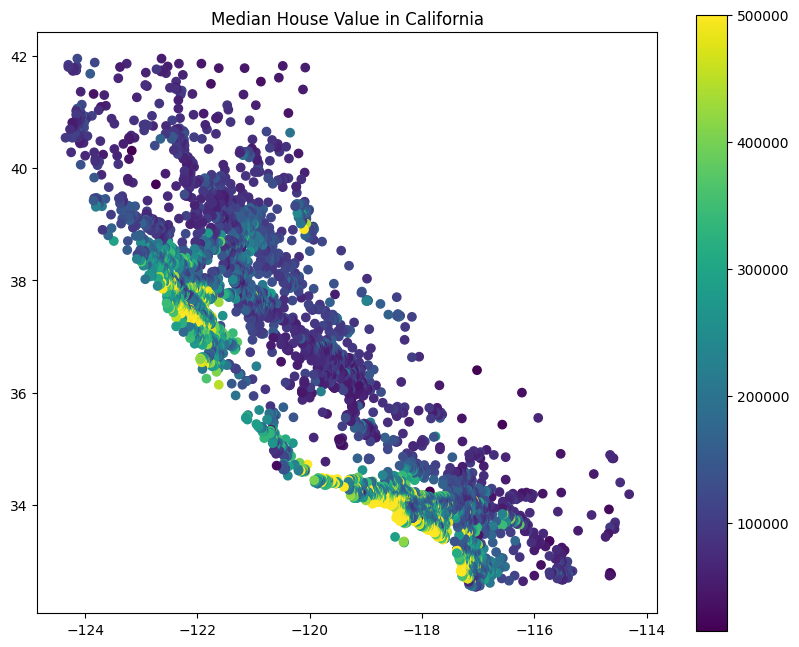

In [2]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create Point geometries from longitude and latitude
geometry = [Point(xy) for xy in zip(california.longitude, california.latitude)]

# Create a GeoDataFrame
geo_california = gp.GeoDataFrame(california, geometry=geometry)

# Plot the median house value
geo_california.plot(column='median_house_value', cmap='viridis', legend=True, figsize=(10, 8))
plt.title('Median House Value in California')
plt.show()


## Integration with Google Drive, kaggle, huggingface

Before moving any further, I need you to have an API key for kaggle and huggingface.

First, we mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then, your Google Drive is at the 'content/drive' directory, and you can access all your files.

## Now, we need a kaggle account and a huggingface account, as well as a location to save the data on Drive

Set the path:

(Here, place yours)

In [4]:
import os
basepath = '/content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science'
%cd {basepath}

/content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science


and make sure the tokens for kaggle and huggingface are present

In [5]:
import os

kaggle_key_location = 'tokens/kaggle.json'
huggingface_key_location = 'tokens/huggingface.txt'
github_key_location = 'tokens/github.txt'

if not os.path.isfile(kaggle_key_location):
    raise FileNotFoundError(f"The Kaggle API key file '{kaggle_key_location}' was not found.")
if not os.path.isfile(huggingface_key_location):
    raise FileNotFoundError(f"The Hugging Face API key file '{huggingface_key_location}' was not found.")

In [6]:
import json
with open(kaggle_key_location, 'r') as f:
    kaggle_key = json.loads(f.read())
with open(huggingface_key_location, 'r') as f:
    huggingface_key = f.read()

import os
os.environ['KAGGLE_USERNAME'] = kaggle_key['username']
os.environ['KAGGLE_KEY'] = kaggle_key['key']

In [7]:
with open(github_key_location, 'r') as f:
    token = f.read()

!git config --global user.email "alvaro.sanchez@cemfi.edu.es"
!git config --global user.name "TheLeache"

## Getting things from Github

We can link GitHub repositories to Colab the same way we would on a local machine. First, we check that git is installed in the virtual machine:

In [8]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


And then, we can clone the GitHub repository for these TA sessions, to the virtual drive of the Colab instance, or to your Google Drive.

You can clone your own private repositories too. You can create a personal access token following the instructions here:

https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/managing-your-personal-access-tokens#creating-a-personal-access-token-classic

And now, I can clone one of my private GitHub repos, by adding my token to the URL:

In [9]:
user = "TheLeache"
repo = "data_science_cemfi_python"

#clone repo if it does not exist:
if not os.path.isdir(repo):

  !git clone https://{token}@github.com/{user}/{repo}.git

I can modify this cloned folder, for instance by saving a plot to it:

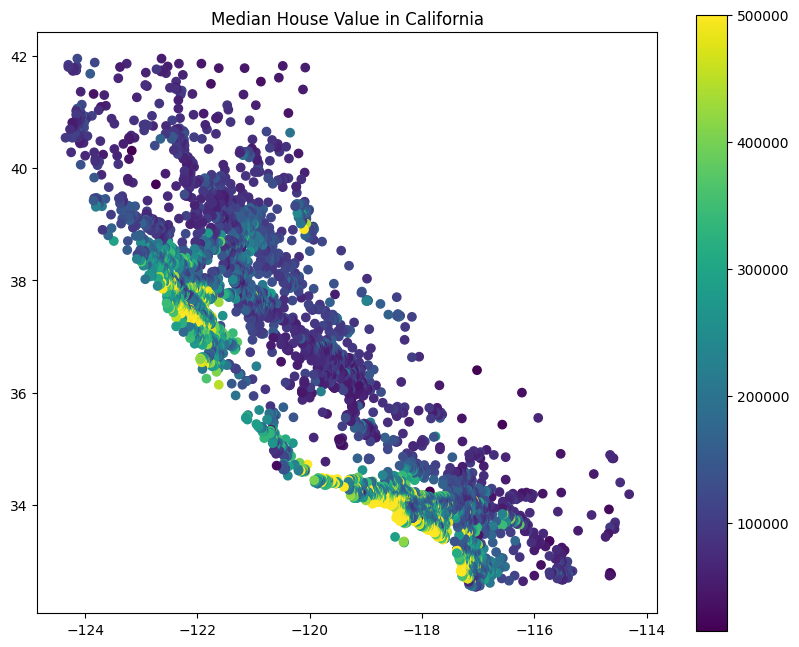

In [10]:
os.makedirs('data_science_cemfi_python/plots/', exist_ok = True)
# Plot the median house value
geo_california.plot(column='median_house_value', cmap='viridis', legend=True, figsize=(10, 8))
plt.title('Median House Value in California')
plt.savefig('data_science_cemfi_python/plots/california_housing.png')

Now, I can use git in the command line to push to the main branch:

```python
!git config --global user.email "alvaro.sanchez@cemfi.edu.es"
!git config --global user.name "TheLeache"

%cd /content/data_science_cemfi_python
!git checkout main
!git remote -v
!git add plots/
!git commit -m "update of california map"
!git push origin main

```

Or to make a new one and create a fork of the repository:

```python
!git switch testbranch
!git push origin testbranch
```

## Loading models and data from Kaggle and Huggingface

Two of the most popular platforms for sharing machine learning models are kaggle and huggingface. You can integrate them into Colab, to download and share models. People also share datasets for learning how to use these tools.

## We have already loaded the access tokens before, so it's all good to go

## Application: Predicting if a videogame is a shooter from its cover


VGChartz is a webpage that collects information on the videogame market.
the dataset asaniczka/video-game-sales-2024 on Kaggle is a scrape of the data in this website. Using the Kaggle API, we download this dataset:

In [11]:
!pwd

/content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science


In [12]:
os.makedirs('videogames', exist_ok=True)  # Create the folder

!kaggle datasets download -d asaniczka/video-game-sales-2024 -p {basepath}/videogames
!unzip -o {basepath}/videogames/video-game-sales-2024.zip -d {basepath}/videogames

Dataset URL: https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024
License(s): ODC Attribution License (ODC-By)
video-game-sales-2024.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science/videogames/video-game-sales-2024.zip
  inflating: /content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science/videogames/vgchartz-2024.csv  


And we can look at its contents:

In [13]:
vg_df = pd.read_csv('videogames/vgchartz-2024.csv')
vg_df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


There are many genres in the data:

In [14]:
vg_df.genre.unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

In [15]:
len(vg_df.genre.unique())

20

### Display the cover of an arbitrary game:

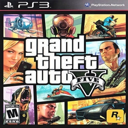

In [16]:
#the column img contains the url for the box art of each game, starting with 'vgchartz.com' and then the entry. I want you to write code to download and display the image for an arbitrary game

from PIL import Image
import requests
from io import BytesIO

# Select an arbitrary game (e.g., the first game in the DataFrame)
game_index = 0


def get_url(df, index):
  return "http://vgchartz.com" + df['img'].iloc[index]
def get_image(df, i):
  image_url = get_url(df, i)
  # Display the image
  response = requests.get(image_url)
  img = Image.open(BytesIO(response.content)).convert('RGB').resize([128, 128])
  return img

get_image(vg_df, 0)

## Create training and validation sets

We want to train a model which learns to classify the genre of a videogame by its box art. For this purpose, we take the highest selling 100 games on the PlayStation3, and we select 20 games randomly to be on the validation set:

In [17]:
# prompt: using the vg_df dataframe, I want you to make a new dataframe for only the videogames with highest value of total_sales on the platform PS3. I then want you to set a seed, and create a training set with 100 videogames, and a validation set with the rest, on two different dataframes

# Create a new DataFrame for PS3 games with the highest total sales
ps3_df = vg_df[vg_df['console'] == 'PS3'].sort_values(by='total_sales', ascending=False).head(150)

# Set a seed for reproducibility
import numpy as np
np.random.seed(1234)

# Shuffle the DataFrame
ps3_df = ps3_df.sample(frac=1).reset_index(drop=True)

# Create training and validation sets
train_size = 100  # Number of games for the training set
df_train = ps3_df[:train_size]
df_validation = ps3_df[train_size:]

print("Training set shape:", df_train.shape)
print("Validation set shape:", df_validation.shape)

Training set shape: (100, 14)
Validation set shape: (100, 14)


In [18]:
df_validation.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
100,/games/boxart/full_9621972AmericaFrontccc.jpg,Dead Space,PS3,Shooter,Electronic Arts,EA Redwood Shores,8.9,2.00,1.05,NaN,0.66,0.29,2008-10-13,NaN
101,/games/boxart/full_6736771AmericaFrontccc.jpg,Madden NFL 09,PS3,Sports,EA Sports,EA Tiburon,8.6,1.89,1.56,0.00,0.15,0.18,2008-08-12,NaN
102,/games/boxart/full_270231AmericaFrontccc.jpg,Assassin's Creed IV: Black Flag,PS3,Action-Adventure,Ubisoft,Ubisoft Montreal,8.7,3.94,1.34,0.13,1.86,0.62,2013-10-29,2018-03-14
103,/games/boxart/full_3173221AmericaFrontccc.jpg,Dragon Age: Origins,PS3,Role-Playing,Electronic Arts,BioWare Edmonton,8.7,1.67,0.96,0.08,0.42,0.21,2009-11-03,NaN
104,/games/boxart/full_7094507AmericaFrontccc.jpg,UFC 2009 Undisputed,PS3,Fighting,THQ,Yuke's Osaka,8.4,1.76,1.07,0.01,0.45,0.24,2009-05-19,NaN


## Create lists of X and Ys for training and validation:

In [19]:
#predicted variable: is it a shooter or not?
y_train, y_test = np.array(df_train['genre'] == 'Shooter'), np.array(df_validation['genre'] == 'Shooter')
#names of game
names_train, names_test = np.array(df_train['title']), np.array(df_validation['title'])
#actual genre of game
genres_train, genres_test = np.array(df_train['genre']), np.array(df_validation['genre'])

In [20]:
from tqdm import tqdm

#x variable: cover of the game, in 128x128x3 format.
X_train, X_test = [], []
for i in tqdm(range(len(df_train)), desc = 'downloading training covers'):
  image = get_image(df_train, i)
  if image.size == (128, 128):
    X_train.append(np.array(image))
for i in tqdm(range(len(df_validation)), desc = 'downloading validation covers'):
  image = get_image(df_validation, i)
  if image.size == (128, 128):
    X_test.append(np.array(image))

X_train = np.array(X_train); X_test = np.array(X_test)

downloading validation covers: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it]


array([[[ 28,  26,  29],
        [ 28,  26,  29],
        [ 30,  25,  30],
        ...,
        [126, 127, 132],
        [126, 127, 132],
        [125, 126, 131]],

       [[ 28,  26,  28],
        [ 29,  26,  28],
        [ 30,  26,  28],
        ...,
        [126, 125, 130],
        [127, 126, 131],
        [126, 126, 131]],

       [[ 30,  26,  27],
        [ 30,  26,  27],
        [ 30,  26,  27],
        ...,
        [126, 125, 130],
        [127, 126, 131],
        [127, 126, 131]],

       ...,

       [[253, 253, 253],
        [244, 244, 244],
        [237, 237, 237],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 254, 253],
        [255, 255, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 253],
        [255, 255, 254],
        [254, 254, 254]]], dtype=uint8)
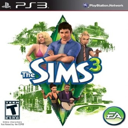

In [21]:
X_train[10]

## Train the model on our training and validation sets:

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with 30 epochs
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4587 - loss: 40.8081 - val_accuracy: 0.8000 - val_loss: 20.1299
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7293 - loss: 22.8728 - val_accuracy: 0.8000 - val_loss: 4.8555
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6670 - loss: 5.9361 - val_accuracy: 0.5600 - val_loss: 0.9911
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 896ms/step - accuracy: 0.4514 - loss: 5.7183 - val_accuracy: 0.8000 - val_loss: 2.0625
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7913 - loss: 2.3269 - val_accuracy: 0.8000 - val_loss: 1.6958
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7248 - loss: 2.0356 - val_accuracy: 0.5600 - val_loss: 0.9253
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6275 - loss: 1.2696 - val_accuracy: 0.7800 - val_loss: 0.7946
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6453 - loss: 1.0435 - val_accuracy: 0.8000 - val_loss: 0.6465
Epoch 9/

## Plot a set of covers, with the genre and the corresponding prediction that it is a shooter. How did we do?

In [23]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step


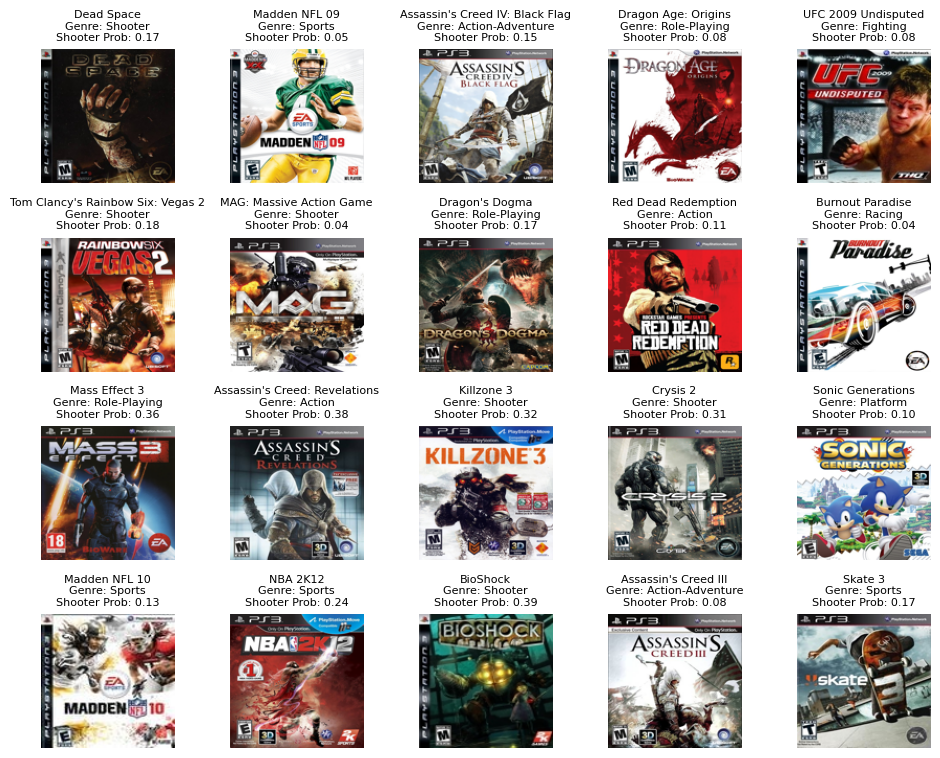

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the grid dimensions
cols = 5  # Maximum number of columns
num_images = 20
rows = (num_images + cols - 1) // cols  # Calculate required rows

# Calculate the figure size to match image size (128x128 pixels per image)
fig_width = cols * 128 / 100 *1.5 # 128 pixels per image, scaled by 100 to fit inches
fig_height = rows * 128 / 100 *1.5# Height for rows

# Create the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

# Loop through the images and display them
for idx, ax in enumerate(axes.flat):
    if idx < num_images:  # Only display available images
        image = X_test[idx]
        prediction = predictions[idx][0]  # Assuming predictions is a NumPy array
        genre = genres_test[idx]
        title = names_test[idx]

        # Display the image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis ticks and labels

        ax.set_title(f"{title}\nGenre: {genre}\nShooter Prob: {prediction:.2f}", fontsize=8)
    else:
        # Hide extra axes if fewer images than grid spaces
        ax.axis('off')

# Set the aspect ratio to 1:1 for all axes (this ensures no distortion of images)
for ax in axes.flat:
    ax.set_aspect('equal')

# Adjust layout to make sure the grid fits without overlapping
plt.tight_layout()
plt.savefig('videogames/ps3_performance_examples.png')
plt.show()


## Evaluate model performance on PS4 games

Let's do the same: Download a few covers, and create predictions

In [25]:
# Create a new DataFrame for PS4 games with the highest total sales
ps4_df = vg_df[vg_df['console'] == 'PS4'].sort_values(by='total_sales', ascending=False).head(75)
# Shuffle the PS4 DataFrame
ps4_df = ps4_df.sample(frac=0.25).reset_index(drop=True)
# Predicted variable: is it a shooter or not?
y_train, y_test = np.array(df_train['genre'] == 'Shooter'), np.array(df_validation['genre'] == 'Shooter')
# Now, separate test set using PS4 games
y_test_ps4 = np.array(ps4_df['genre'] == 'Shooter')
names_test_ps4 = np.array(ps4_df['title'])
genres_test_ps4 = np.array(ps4_df['genre'])

X_test_ps4 = []
for i in tqdm(range(len(ps4_df)), desc='Downloading PS4 test covers'):
    image = get_image(ps4_df, i)
    if image.size == (128, 128):
        X_test_ps4.append(np.array(image))

X_test_ps4 = np.array(X_test_ps4)

# Now we test on the PS4 test set (out-of-sample data)
predictions_ps4 = model.predict(X_test_ps4)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


## And we plot them again:

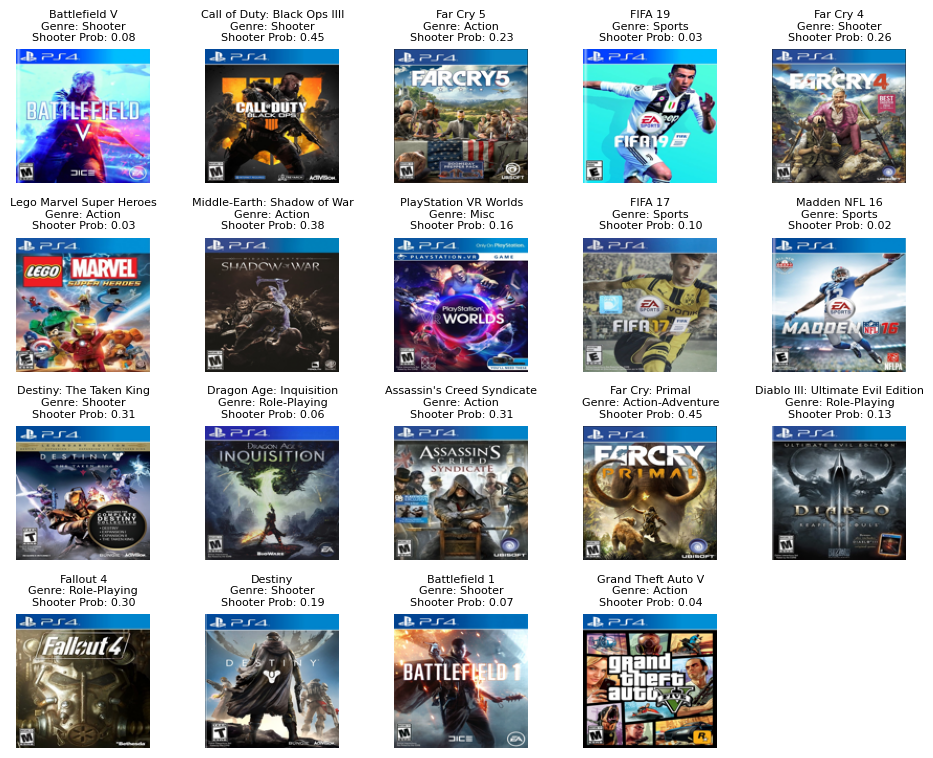

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the grid dimensions
cols = 5  # Maximum number of columns
num_images = len(X_test_ps4)
rows = (num_images + cols - 1) // cols  # Calculate required rows

# Calculate the figure size to match image size (128x128 pixels per image)
fig_width = cols * 128 / 100 * 1.5  # 128 pixels per image, scaled by 100 to fit inches
fig_height = rows * 128 / 100 * 1.5  # Height for rows

# Create the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

# Loop through the images and display them
for idx, ax in enumerate(axes.flat):
    if idx < num_images:  # Only display available images
        image = X_test_ps4[idx]
        prediction = predictions_ps4[idx][0]  # Assuming predictions_ps4 is a NumPy array
        genre = genres_test_ps4[idx]
        title = names_test_ps4[idx]

        # Display the image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis ticks and labels

        ax.set_title(f"{title}\nGenre: {genre}\nShooter Prob: {prediction:.2f}", fontsize=8)
    else:
        # Hide extra axes if fewer images than grid spaces
        ax.axis('off')

# Set the aspect ratio to 1:1 for all axes (this ensures no distortion of images)
for ax in axes.flat:
    ax.set_aspect('equal')

# Adjust layout to make sure the grid fits without overlapping
plt.tight_layout()
plt.savefig('videogames/ps4_performance_examples.png')
plt.show()


## And finally, we save the model to huggingface:

In [28]:
import shutil

shutil.rmtree('videogames_model_repo', ignore_errors=True)

In [31]:
from huggingface_hub import login, create_repo, Repository
import os
from huggingface_hub import HfApi

# Authenticate to Hugging Face Hub
login(token=huggingface_key)

# Create a new Hugging Face repository (set exist_ok=True to avoid errors if the repo already exists)
repo_url = create_repo(
    repo_id="videogames",
    token=huggingface_key,
    private=False,
    exist_ok=True
)

print(f"Repository created at: {repo_url}")

# Save the Keras model inside the cloned repository directory
model.save("videogames/videogames_model.keras")

api = HfApi()
api.upload_folder(
    folder_path="videogames",
    repo_id="TheLeache/videogames",
    repo_type="model",
)


Repository created at: https://huggingface.co/TheLeache/videogames


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

video-game-sales-2024.zip:   0%|          | 0.00/1.99M [00:00<?, ?B/s]

videogames_model.keras:   0%|          | 0.00/39.7M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/TheLeache/videogames/commit/56453de1109c7f6282a6a4186fbd379759638171', commit_message='Upload folder using huggingface_hub', commit_description='', oid='56453de1109c7f6282a6a4186fbd379759638171', pr_url=None, repo_url=RepoUrl('https://huggingface.co/TheLeache/videogames', endpoint='https://huggingface.co', repo_type='model', repo_id='TheLeache/videogames'), pr_revision=None, pr_num=None)

## Now, try to load a classmate's model?


In [34]:
drive.flush_and_unmount()